# Survey Analysis: Star Wars The Empire Strikes Back

In this project we attempt to answer the question: does America think that "The Empire Strikes Back" is the best Star Wars movie? We will attempt to answer this by analyzing survey response data from a survey conducted by [FiveThirtyEight](https://fivethirtyeight.com/). 

The raw data can be downloaded from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# format the notebook so we can see all columns
pd.set_option('display.max_columns', 1000)

In [2]:
data = pd.read_csv('StarWars.csv', encoding="ISO-8859-1")

## Initial Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

There are 36 columns representing survey questions, one column representing a unique identifier for the responses, one column representing the region in which the survey was collected, and 1187 rows of survey responses. Some of the columns are not immediately clear of what the question asked and we will need to explore further whether we can find out what these were. There is a significant presence of null values.

In [4]:
data.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We can see a relationship between the column names and row 1 of the dataset. Row 1 appears not to be a survey response, but rather suboptions for questions asked. There are ranked choice, alternate format, and likert scale questions that we will need to reformat. 

## Data Clean-Up

### Changing Yes/No Questions to True/False

We will want to change columns that are yes/no format to True/Fale so we can use boolean analysis techniques.

In [5]:
# create a dictionary as a map reference
tf_map = {'Yes': True, 'No': False}
# create a list of our target columns
yn_columns = ['Have you seen any of the 6 films in the Star Wars franchise?',
            'Do you consider yourself to be a fan of the Star Wars film franchise?',
           'Are you familiar with the Expanded Universe?',
           'Do you consider yourself to be a fan of the Expanded Universe?æ',
           'Do you consider yourself to be a fan of the Star Trek franchise?']
# map the dictionary to each series based on the column names in our list
for col in yn_columns:
    data[col] = data[col].map(tf_map)

In [6]:
# check that the values have changed
data[yn_columns].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?
0,NaN,NaN,NaN,NaN,NaN
1,True,True,True,False,False
2,False,NaN,NaN,NaN,True
3,True,False,False,NaN,False
4,True,True,False,NaN,True


### Changing String Objects To True/False

Columns 4 - 9 represent whether a resondent had seen a certain movie. If a column has the name of the movie, that means they saw the movie. Let's rename the column names to be more intuitive and change the values to True and False instead of string objects.

In [7]:
data.iloc[:1,3:9]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [8]:
seen_list = data.iloc[:1,3:9]

In [9]:
# create a list using the above dataframe 
movie_list = data.iloc[:1,3:9].values.tolist()[0]
# turn that list into a series
movie_series =  pd.Series(movie_list)
# Replace Star Wars with Seen and strip whitespace
movie_series = movie_series.str.replace('Star Wars: ',"Seen ").str.replace(" ","_").str.strip().str.lower()
# return to list
seen_list = movie_series.tolist()
print(seen_list)

['seen_episode_i__the_phantom_menace', 'seen_episode_ii__attack_of_the_clones', 'seen_episode_iii__revenge_of_the_sith', 'seen_episode_iv__a_new_hope', 'seen_episode_v_the_empire_strikes_back', 'seen_episode_vi_return_of_the_jedi']


In [10]:
# create a list of target column names
column_list_seen = data.iloc[:1,3:9].columns.tolist()
print(column_list_seen)

['Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']


In [11]:
# create a dictionary of old to new names
column_rename_seen = {}
for old, new in zip(column_list_seen, seen_list):
    column_rename_seen[old] = new
print(column_rename_seen)

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_episode_i__the_phantom_menace', 'Unnamed: 4': 'seen_episode_ii__attack_of_the_clones', 'Unnamed: 5': 'seen_episode_iii__revenge_of_the_sith', 'Unnamed: 6': 'seen_episode_iv__a_new_hope', 'Unnamed: 7': 'seen_episode_v_the_empire_strikes_back', 'Unnamed: 8': 'seen_episode_vi_return_of_the_jedi'}


In [12]:
# rename the columns
data = data.rename(columns = column_rename_seen)
# check the changes to confirm
data.iloc[:1,3:9]

,seen_episode_i__the_phantom_menace,seen_episode_ii__attack_of_the_clones,seen_episode_iii__revenge_of_the_sith,seen_episode_iv__a_new_hope,seen_episode_v_the_empire_strikes_back,seen_episode_vi_return_of_the_jedi
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


Now that the column names are renamed in a way that makes sense, we will now change the values in the columns to True or False.

In [13]:
# create a mapping dictionary for True False
movie_tf_dic = {}
for movie in movie_list:
    movie_tf_dic[movie] = True
movie_tf_dic[np.NaN] = False
print(movie_tf_dic)

{'Star Wars: Episode I  The Phantom Menace': True, 'Star Wars: Episode II  Attack of the Clones': True, 'Star Wars: Episode III  Revenge of the Sith': True, 'Star Wars: Episode IV  A New Hope': True, 'Star Wars: Episode V The Empire Strikes Back': True, 'Star Wars: Episode VI Return of the Jedi': True, nan: False}


In [14]:
# function that takes a dataframe, breaks it into a series and applies the mapping dictionary to it
def movie_to_bool(dataframe):
    for col in seen_list:
        dataframe[col] = dataframe[col].map(movie_tf_dic)
    return dataframe

In [15]:
data.iloc[:,3:9] = movie_to_bool(data.iloc[:,3:9])

In [16]:
# cheeck that our columns are changed
data.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_episode_i__the_phantom_menace,seen_episode_ii__attack_of_the_clones,seen_episode_iii__revenge_of_the_sith,seen_episode_iv__a_new_hope,seen_episode_v_the_empire_strikes_back,seen_episode_vi_return_of_the_jedi,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,NaN,NaN,NaN,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Formatting Ranked Choice Columns

We will take a similar approach as before in renaming the columns, however, this time we will only need to turn the values in our columns to floats.

In [17]:
# show our target data
data.iloc[:1,9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [18]:
# reuse an old series and modify it slightly
movie_rank_series = movie_series.str.replace("seen","rank")
# turn that series into a list
movie_rank_list = list(movie_rank_series)
print(movie_rank_list)

['rank_episode_i__the_phantom_menace', 'rank_episode_ii__attack_of_the_clones', 'rank_episode_iii__revenge_of_the_sith', 'rank_episode_iv__a_new_hope', 'rank_episode_v_the_empire_strikes_back', 'rank_episode_vi_return_of_the_jedi']


In [19]:
# create a list of our target column names
rank_columns = data.iloc[:1,9:15].columns.tolist()
print(rank_columns)

['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']


In [20]:
# create a dictionary of our old to new names
column_rename_rank = {}
for old, new in zip(rank_columns, movie_rank_list):
    column_rename_rank[old] = new
print(column_rename_rank)

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_episode_i__the_phantom_menace', 'Unnamed: 10': 'rank_episode_ii__attack_of_the_clones', 'Unnamed: 11': 'rank_episode_iii__revenge_of_the_sith', 'Unnamed: 12': 'rank_episode_iv__a_new_hope', 'Unnamed: 13': 'rank_episode_v_the_empire_strikes_back', 'Unnamed: 14': 'rank_episode_vi_return_of_the_jedi'}


In [21]:
# rename the columns with the dictionary
data = data.rename(columns = column_rename_rank)
data.iloc[:2, 9:15]

,rank_episode_i__the_phantom_menace,rank_episode_ii__attack_of_the_clones,rank_episode_iii__revenge_of_the_sith,rank_episode_iv__a_new_hope,rank_episode_v_the_empire_strikes_back,rank_episode_vi_return_of_the_jedi
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3,2,1,4,5,6


In [22]:
# convert the integers to float
data.iloc[1:,9:15] = data.iloc[1:,9:15].astype(float)
data[data.columns[9:15]].head()

,rank_episode_i__the_phantom_menace,rank_episode_ii__attack_of_the_clones,rank_episode_iii__revenge_of_the_sith,rank_episode_iv__a_new_hope,rank_episode_v_the_empire_strikes_back,rank_episode_vi_return_of_the_jedi
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3


### Formatting Character Favorability Columns

In [23]:
# show target data
data.iloc[:,15:29].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably


In [24]:
# create a list of characters
character_list = data.iloc[:,15:29].values.tolist()[0]
print(character_list)

['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda']


In [25]:
# create a list of our column names
character_columns =  data.iloc[:,15:29].columns.tolist()
print(character_columns)

['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28']


In [26]:
# create a dictionary of old to new
new_character_col = {}
for old, new in zip(character_columns, character_list):
    new_character_col[old] = new
print(new_character_col)

{'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo', 'Unnamed: 16': 'Luke Skywalker', 'Unnamed: 17': 'Princess Leia Organa', 'Unnamed: 18': 'Anakin Skywalker', 'Unnamed: 19': 'Obi Wan Kenobi', 'Unnamed: 20': 'Emperor Palpatine', 'Unnamed: 21': 'Darth Vader', 'Unnamed: 22': 'Lando Calrissian', 'Unnamed: 23': 'Boba Fett', 'Unnamed: 24': 'C-3P0', 'Unnamed: 25': 'R2 D2', 'Unnamed: 26': 'Jar Jar Binks', 'Unnamed: 27': 'Padme Amidala', 'Unnamed: 28': 'Yoda'}


In [27]:
# rename the columns 
data = data.rename(columns = new_character_col)
data.iloc[:,15:29].head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably


In [28]:
# create a list of possible values of character favorability
character_values = data.iloc[1:,15:29].stack().unique()
print(character_values)

['Very favorably' 'Unfamiliar (N/A)' 'Somewhat favorably'
 'Somewhat unfavorably' 'Very unfavorably'
 'Neither favorably nor unfavorably (neutral)']


In [29]:
# create a mapping dictionary
favorability_dic = {'Very unfavorably': 1.0, 'Somewhat unfavorably':2.0, 'Neither favorably nor unfavorably (neutral)': 3.0, 'Somewhat favorably': 4.0, 'Very favorably': 5.0, 'Unfamiliar (N/A)': np.nan }

In [30]:
# function that takes a dataframe, breaks it into a series and maps the mapping dictionary to it
def character_fav_to_float(dataframe):
    for char in character_list:
        dataframe[char] = dataframe[char].map(favorability_dic)
    return dataframe

In [31]:
# apply the function to the dataframe
data.iloc[1:,15:29] = character_fav_to_float(data.iloc[1:,15:29])

In [32]:
# show our changes reflected
data.iloc[:,15:29].head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,5,5,5,5,5,5,5,NaN,NaN,5,5,5,5,5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,5,5,5,4,5,4,2,5,5,5,5,5


### Remove First Row

We've come to a point where we no longer need the values in the first row as a reference for our clean-up. Let's remove that.

In [33]:
# remove the first column
data = data.iloc[1:,:]
# reset the index so it starts at zero, drop the new column it creates
data.reset_index(inplace = True, drop=True)
data.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_episode_i__the_phantom_menace,seen_episode_ii__attack_of_the_clones,seen_episode_iii__revenge_of_the_sith,seen_episode_iv__a_new_hope,seen_episode_v_the_empire_strikes_back,seen_episode_vi_return_of_the_jedi,rank_episode_i__the_phantom_menace,rank_episode_ii__attack_of_the_clones,rank_episode_iii__revenge_of_the_sith,rank_episode_iv__a_new_hope,rank_episode_v_the_empire_strikes_back,rank_episode_vi_return_of_the_jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,5,5,5,5,5,5,5,NaN,NaN,5,5,5,5,5,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
1,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,4,4,4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,5,5,5,5,5,4,5,4,2,5,5,5,5,5,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,5,4,4,2,5,1,4,3,5,4,4,1,4,4,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The rest of our data looks ok and we can begin our analysis.

## Data Analysis

### Most Popular Movie

We can find the most popular movie by taking the mean of the movie rankings sub-dataframe.

In [34]:
# create an object that is the mean of our dataframe
movie_rankings = data.iloc[:,9:15].mean()

In [35]:
movie_rankings

rank_episode_i__the_phantom_menace        3.732934
rank_episode_ii__attack_of_the_clones     4.087321
rank_episode_iii__revenge_of_the_sith     4.341317
rank_episode_iv__a_new_hope               3.272727
rank_episode_v_the_empire_strikes_back    2.513158
rank_episode_vi_return_of_the_jedi        3.047847
dtype: float64

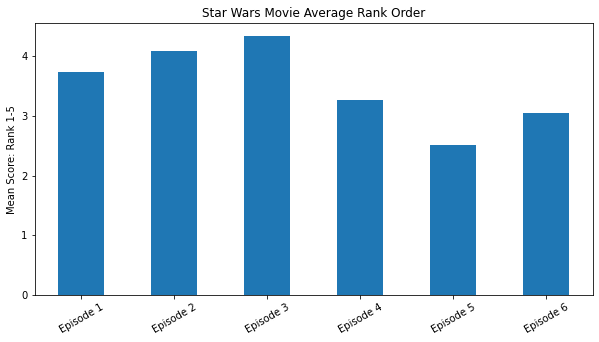

In [36]:
movie_rankings.plot.bar(figsize = (10,5))
plt.title('Star Wars Movie Average Rank Order')
plt.ylabel('Mean Score: Rank 1-5')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], labels = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6'], rotation = 30)
plt.show()

This set of survey questions was formatted in ranked order, with 1 being the best and 6 being the worst. 

Survey respondents felt that episodes 4-6 were better than episodes 1-3. The best ranked movie was episode 5 and the worst ranked movie was episode 3.

### Movies Respondents Have Seen

In [37]:
# create an object that is a sum of the seen series
movie_viewership = data.iloc[:,3:9].sum()

In [38]:
movie_viewership

seen_episode_i__the_phantom_menace        673
seen_episode_ii__attack_of_the_clones     571
seen_episode_iii__revenge_of_the_sith     550
seen_episode_iv__a_new_hope               607
seen_episode_v_the_empire_strikes_back    758
seen_episode_vi_return_of_the_jedi        738
dtype: int64

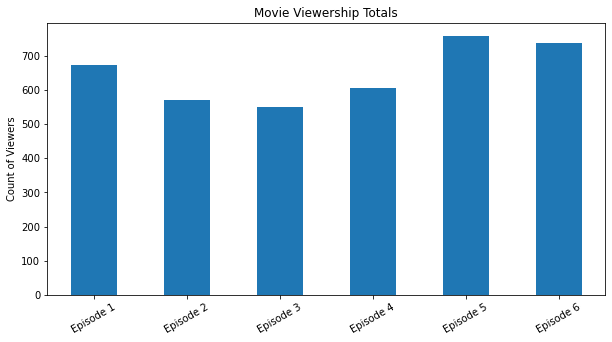

In [39]:
movie_viewership.plot.bar(figsize = (10,5))
plt.title('Movie Viewership Totals')
plt.ylabel('Count of Viewers')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], labels = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6'], rotation = 30)
plt.show()

We can see that this chart has an inverse curve to the previous. Thinking about why this might be, it makes sense that there is a correlation with viewership and perceived quality of a movie. Movies that people like are more likely to be seen by more people due to network, marketing, and fanbase affects.

### Subsecting Our Data for Analysis

#### Cohorts

It will be useful to know how different cohorts answered the above questions. Let's create cohorts of interest and repeat the above analysis.

In [40]:
# self ascribed Star Wars Fans
fans = data[data['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]

In [41]:
# Male and Female 
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

In [42]:
# Age
eightteen_to_twenty = data[data['Age'] == '18-29']
thirty_to_fortyfour = data[data['Age'] == '30-44']
fortyfive_to_sixty = data[data['Age'] == '45-60']
sixty_plus = data[data['Age'] == '> 60']

### Cohort Analysis

#### Movie Popularity - Star Wars Fans

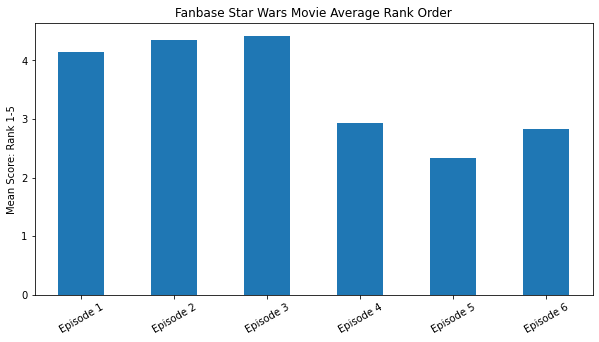

In [43]:
fan_mp = fans.iloc[:,9:15].mean()
fan_mp.plot.bar(figsize = (10,5))
plt.title('Fanbase Star Wars Movie Average Rank Order')
plt.ylabel('Mean Score: Rank 1-5')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], labels = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6'], rotation = 30)
plt.show()

The shape of the curve matches that of the overall curve, however, it is slightly more exaggerated. This might indicate that fans were more critical of the new set of movies (episodes 1-3).

#### Movie Viewership - Star Wars Fans

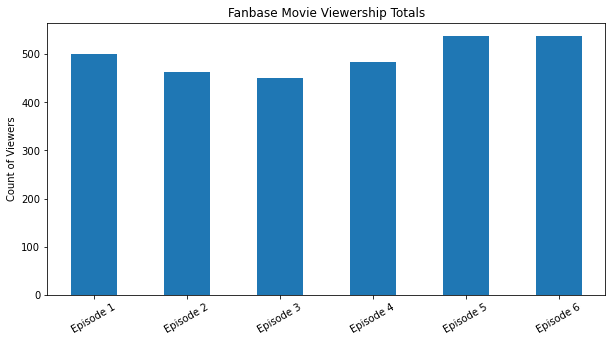

In [44]:
fan_view = fans.iloc[:,3:9].sum()
fan_view.plot.bar(figsize = (10,5))
plt.title('Fanbase Movie Viewership Totals')
plt.ylabel('Count of Viewers')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], labels = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6'], rotation = 30)
plt.show()

Overall, fans tend to see movies regardless of the perceived quality of the movie. Given that they are self proclaimed fans, this is expected behavior.

#### Movie Popularity - Male and Female

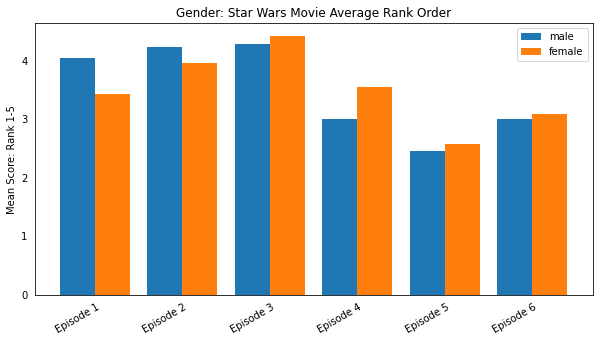

In [45]:
male_pop = male_data.iloc[:,9:15].mean()
female_pop = female_data.iloc[:,9:15].mean()

# number of pairs of bars
N = 6
#position of bar on x-axis
ind = np.arange(N)
# width of bar 
width = 0.4

fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(ind,male_pop, width, label = 'male')
ax.bar(ind + width,female_pop, width, label = 'female')
ax.tick_params(bottom=0, left=0)

plt.title('Gender: Star Wars Movie Average Rank Order')
plt.ylabel('Mean Score: Rank 1-5')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], labels = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6'], rotation = 30)
plt.legend()
plt.show()

Females tend to like episode 1 more than males, and dislike episode 4 more than males, otherwise the trends are similar.

#### Movie Viewership - Male and Female

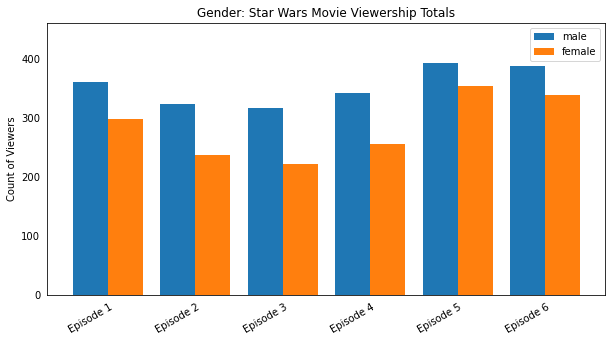

In [46]:
male_viewership = male_data.iloc[:,3:9].sum()
female_viewership = female_data.iloc[:,3:9].sum()

# number of pairs of bars
N = 6
#position of bar on x-axis
ind = np.arange(N)
# width of bar 
width = 0.4

fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(ind,male_viewership, width, label = 'male')
ax.bar(ind + width,female_viewership, width, label = 'female')
ax.tick_params(bottom=0, left=0)

plt.ylim(0, 460)
plt.title('Gender: Star Wars Movie Viewership Totals')
plt.ylabel('Count of Viewers')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], labels = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6'], rotation = 30)

plt.legend(loc = 'best')

plt.show()

There are more total male viewers, however, the rate at which they see each movie appears similar. There is a higher occurance of females seeing episodes 5 and 6 when compared with the other movies. 

#### Movie Popularity - Age

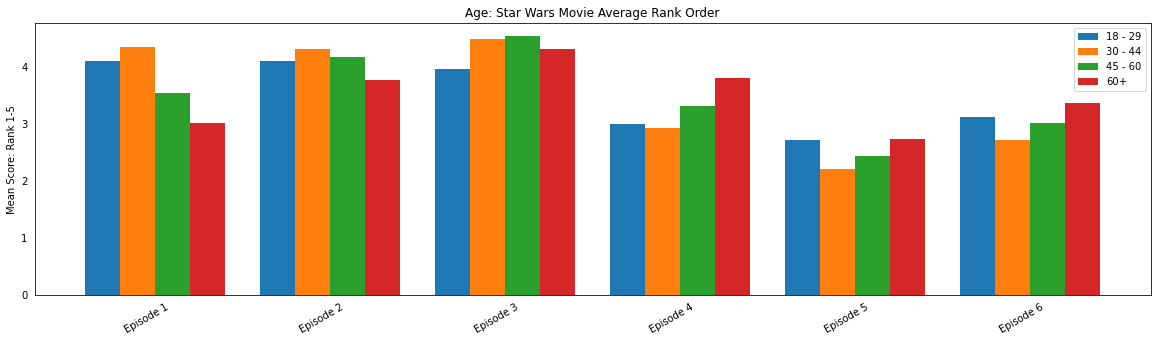

In [47]:
eightteen_to_twenty_pop = eightteen_to_twenty.iloc[:,9:15].mean()
thirty_to_fortyfour_pop = thirty_to_fortyfour.iloc[:,9:15].mean()
fortyfive_to_sixty_pop = fortyfive_to_sixty.iloc[:,9:15].mean()
sixty_plus_pop = sixty_plus.iloc[:,9:15].mean()

# number of pairs of bars
N = 6
#position of bar on x-axis
ind = np.arange(N)
# width of bar 
width = 0.20

fig, ax = plt.subplots(figsize = (20, 5))
ax.bar(ind, eightteen_to_twenty_pop, width, label = '18 - 29')
ax.bar(ind + width, thirty_to_fortyfour_pop, width, label = '30 - 44')
ax.bar(ind + (width*2), fortyfive_to_sixty_pop, width, label = '45 - 60')
ax.bar(ind + (width*3), sixty_plus_pop, width, label = '60+')
ax.tick_params(bottom=0, left=0)

plt.title('Age: Star Wars Movie Average Rank Order')
plt.ylabel('Mean Score: Rank 1-5')
plt.xticks(ticks = [0.25, 1.25, 2.25, 3.25, 4.25, 5.25], labels = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6'], rotation = 30)
plt.legend()
plt.show()

All age groups follow a similar trend in how they rank the movies, the newer movies (episodes 1-3) are less favorable than the orginial trilogy (episodes 4-6). 

The only exceptions we see is episode 1 was voted more popular with the 45-60 and 60+ cohorts and epised 4 was seen as less favorable.

#### Movie Viewership - Age

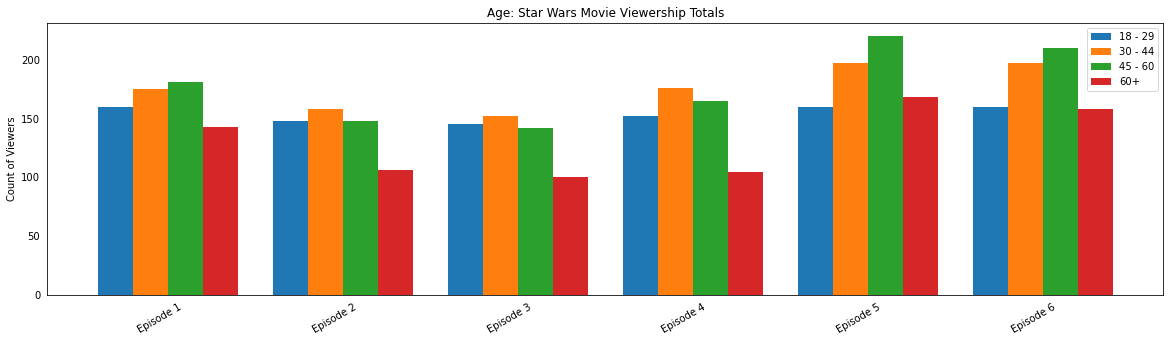

In [48]:
eightteen_to_twenty_view = eightteen_to_twenty.iloc[:,3:9].sum()
thirty_to_fortyfour_view = thirty_to_fortyfour.iloc[:,3:9].sum()
fortyfive_to_sixty_view = fortyfive_to_sixty.iloc[:,3:9].sum()
sixty_plus_view = sixty_plus.iloc[:,3:9].sum()

# number of pairs of bars
N = 6
#position of bar on x-axis
ind = np.arange(N)
# width of bar 
width = 0.20

fig, ax = plt.subplots(figsize = (20, 5))
ax.bar(ind, eightteen_to_twenty_view, width, label = '18 - 29')
ax.bar(ind + width, thirty_to_fortyfour_view, width, label = '30 - 44')
ax.bar(ind + (width*2), fortyfive_to_sixty_view, width, label = '45 - 60')
ax.bar(ind + (width*3), sixty_plus_view, width, label = '60+')
ax.tick_params(bottom=0, left=0)

plt.title('Age: Star Wars Movie Viewership Totals')
plt.ylabel('Count of Viewers')
plt.xticks(ticks = [0.25, 1.25, 2.25, 3.25, 4.25, 5.25], labels = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6'], rotation = 30)
plt.legend()
plt.show()

If someone is in the 18-29 age group and they've seen star wars, they are more likely to have seen all the movies.

As age increases, the likelihood that someone has seen newer movies is less likely than the likelihood that they have seen the older Star Wars movies

### Character Perceptions

#### Bar Chart

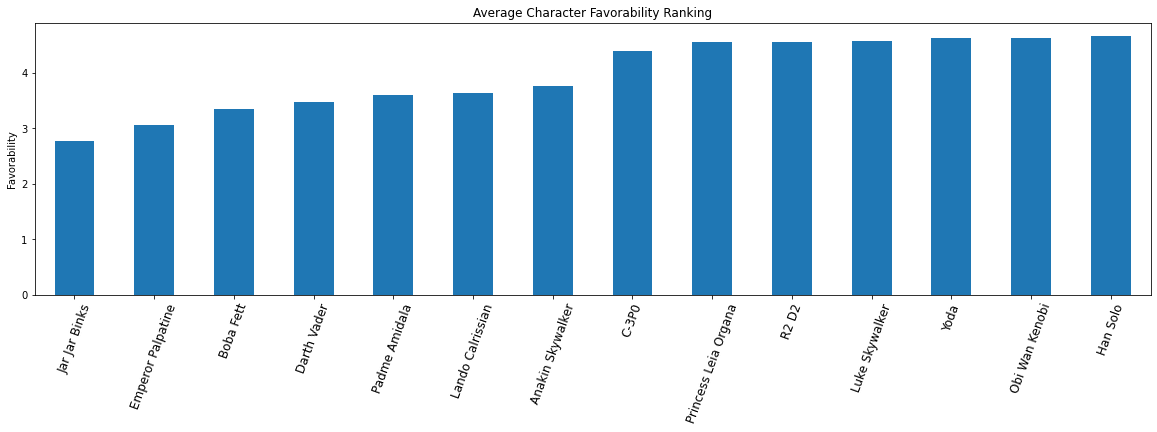

In [49]:
# take the mean values of the target dataframe and sort them  
character_perceptions = data.iloc[:,15:29].mean().sort_values()

character_perceptions.plot.bar(figsize=(20,5))
plt.ylabel('Favorability')
plt.title('Average Character Favorability Ranking')
plt.xticks(fontsize = 12, rotation = 70)
plt.show()

The classic characters are, on average, rated more favorbaly than new introductions.

Heros are rated more favorably than villains.

Secondary characters are rated less favorably.

#### Stacked Bar Chart

It may be interesting to look at this in stacked barchart form to understand the distribution of the ratings. Let's create some objects to help us to this.

In [50]:
# create a function that takes a series and sums combinations of values
def fav_sums(ser):
    favorability_sums_dic = {}
    
    very_unfav_sum = ser[ser == 1.0].count()
    some_unfav_sum = ser[ser == 2.0].count()
    neither_fav = ser[ser == 3.0].count()
    some_fav_sum = ser[ser == 4.0].count()
    very_fav_sum = ser[ser == 5.0].count()
    Unfamiliar_sum = ser[ser.isnull()].isnull().sum()
    
    favorability_sums_dic['Very Unfavorably'] = very_unfav_sum
    favorability_sums_dic['Somewhat Unfavorably'] = some_unfav_sum
    favorability_sums_dic['Neutral'] = neither_fav
    favorability_sums_dic['Somewhat Favorably'] = some_fav_sum
    favorability_sums_dic['Very Favorably'] = very_fav_sum
    favorability_sums_dic['Unfamiliar'] =  Unfamiliar_sum
    
    return favorability_sums_dic

In [51]:
# example of what one series looks like run through this function
fav_sums(data['Jar Jar Binks'])

{'Very Unfavorably': 204,
 'Somewhat Unfavorably': 102,
 'Neutral': 164,
 'Somewhat Favorably': 130,
 'Very Favorably': 112,
 'Unfamiliar': 474}

In [52]:
# loop through each series in the df and apply the function to the series and save the dictionary to a list
def character_fav_sum_dic(dataframe):
    dic_dic = {}
    for char in character_list: 
         dic = fav_sums(dataframe[char])
         dic_dic[char] = dic
    return dic_dic

In [53]:
# run our dataframe the dictionary creation function
dictionary_of_dictionaries = character_fav_sum_dic(data.iloc[:,15:29])

In [54]:
# show the results
for d in dictionary_of_dictionaries:
    print(d)
    print(dictionary_of_dictionaries[d])
    print('\n')

Han Solo
{'Very Unfavorably': 1, 'Somewhat Unfavorably': 8, 'Neutral': 44, 'Somewhat Favorably': 151, 'Very Favorably': 610, 'Unfamiliar': 372}


Luke Skywalker
{'Very Unfavorably': 3, 'Somewhat Unfavorably': 13, 'Neutral': 38, 'Somewhat Favorably': 219, 'Very Favorably': 552, 'Unfamiliar': 361}


Princess Leia Organa
{'Very Unfavorably': 6, 'Somewhat Unfavorably': 12, 'Neutral': 48, 'Somewhat Favorably': 210, 'Very Favorably': 547, 'Unfamiliar': 363}


Anakin Skywalker
{'Very Unfavorably': 39, 'Somewhat Unfavorably': 83, 'Neutral': 135, 'Somewhat Favorably': 269, 'Very Favorably': 245, 'Unfamiliar': 415}


Obi Wan Kenobi
{'Very Unfavorably': 7, 'Somewhat Unfavorably': 8, 'Neutral': 43, 'Somewhat Favorably': 159, 'Very Favorably': 591, 'Unfamiliar': 378}


Emperor Palpatine
{'Very Unfavorably': 124, 'Somewhat Unfavorably': 68, 'Neutral': 213, 'Somewhat Favorably': 143, 'Very Favorably': 110, 'Unfamiliar': 528}


Darth Vader
{'Very Unfavorably': 149, 'Somewhat Unfavorably': 102, 'Neutra

As a last prep step, we will turn the dictionary of dictionaries into a dataframe so we can use pandas queries on it.

In [55]:
sums_character_rankings = pd.DataFrame(dictionary_of_dictionaries).transpose()
sums_character_rankings.reset_index(inplace=True)
sums_character_rankings = sums_character_rankings.rename(columns ={'index':'Characters'})

In [56]:
sums_character_rankings

,Characters,Very Unfavorably,Somewhat Unfavorably,Neutral,Somewhat Favorably,Very Favorably,Unfamiliar
0,Han Solo,1,8,44,151,610,372
1,Luke Skywalker,3,13,38,219,552,361
2,Princess Leia Organa,6,12,48,210,547,363
3,Anakin Skywalker,39,83,135,269,245,415
4,Obi Wan Kenobi,7,8,43,159,591,378
5,Emperor Palpatine,124,68,213,143,110,528
6,Darth Vader,149,102,84,171,310,370
7,Lando Calrissian,8,63,236,223,142,514
8,Boba Fett,45,96,248,153,138,506
9,C-3P0,7,23,79,229,474,374


In [57]:
# move the unfamiliar column so it is on the next to unfavorably
# create a object for insert func call that removes the column
unf_col = sums_character_rankings.pop('Unfamiliar')
# insert the column in the new location
sums_character_rankings.insert(1,'Unfamiliar', unf_col)
# sort the values by the Very Favorably column
sums_character_rankings = sums_character_rankings.sort_values('Very Favorably')

We now have a dataframe containing our character favorability rankings. We should now be able to create a stacked bar chart with these values.

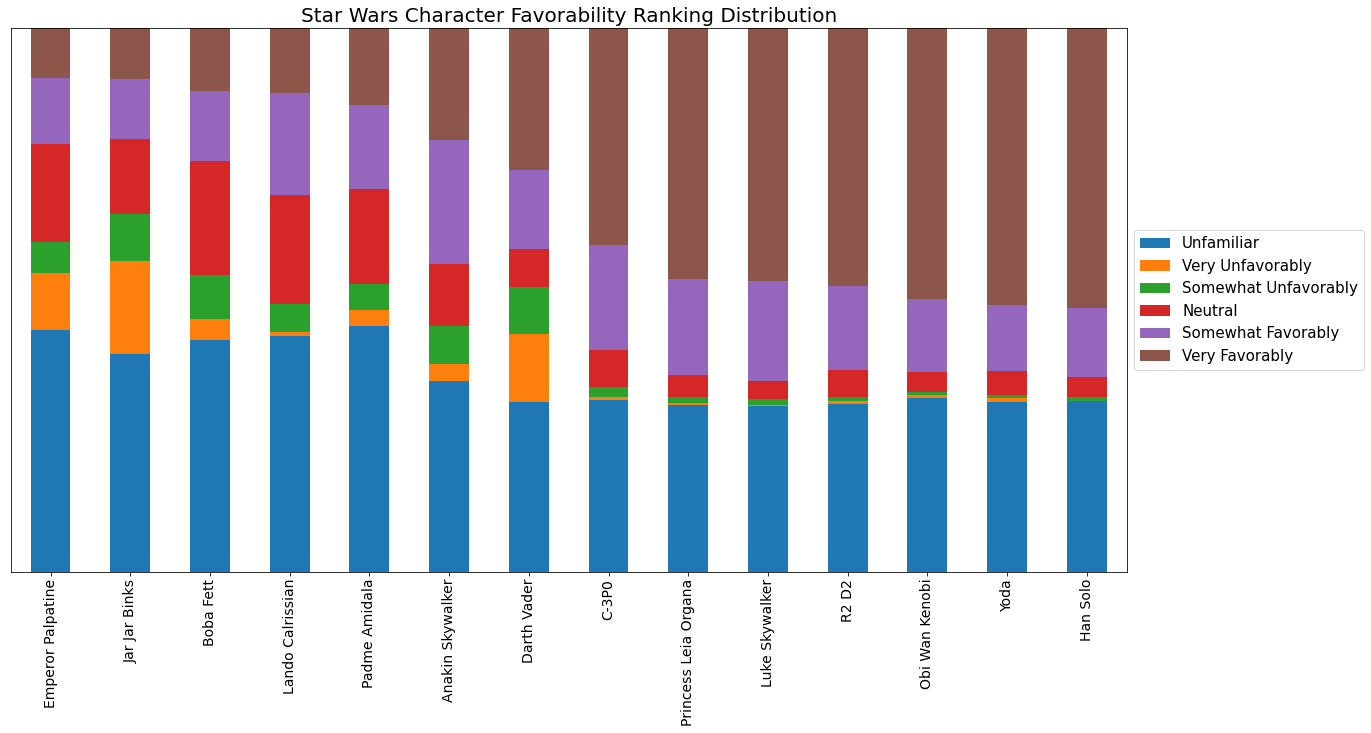

In [58]:
sums_character_rankings.plot(x = 'Characters', 
                             kind = 'bar', 
                             stacked = 'True', 
                             figsize = (20, 10),
                             ylim = (0, 1186),
                             yticks = [],
                             xlabel = '',
                             fontsize = 14)


plt.title('Star Wars Character Favorability Ranking Distribution', fontsize = 20)
plt.legend(loc = 'center left', bbox_to_anchor=(1.0, 0.5), fontsize = 15)
plt.show()

Jar Jar Binks, Emporer Palpatine,and Darth Vader are controversial characters in that the have a mix of very favorable and unfavorable rankings.

Characters with a high distribution of Very Favorable rankings have almost no unfavorable rankings.